### 1导入NeMo工具库与相关工具类

In [1]:
#import nemo
#import nemo.collections.asr as nemo_asr
#import nemo.collections.nlp as nemo_nlp
#import nemo.collections.tts as nemo_tts
from nemo.collections import nlp as nemo_nlp
from nemo.utils.exp_manager import exp_manager #模型训练管理工具 存放训练日志

import os
import wget
import pytorch_lightning as pl
from omegaconf import OmegaConf #配置文件工具库
import soundfile as sf
import torch
import IPython

ModuleNotFoundError: No module named 'nemo'

### 2 加载相关模型

In [ ]:
# 加载语音识别模型- QuartzNet
quartznet = nemo_asr.models.EncDecCTCModel.from_pretrained(model_name="stt_en_quartznet15x5").cuda()
# 加载神经机器翻译模型
nmt_model = nemo_nlp.models.MTEncDecModel.from_pretrained(model_name="nmt_en_zh_transformer6x6").cuda()
# 加载从文本到频谱生成模型
spectrogram_generator = nemo_tts.models.Tacotron2Model.from_pretrained(model_name="tts_en_tacotron2").cuda()
# 加载声码器
# vocoder = nemo_tts.models.WaveGlowModel.restore_from("tts_waveglow_88m").cuda()
vocoder = nemo_tts.models.MelGanModel.from_pretrained(model_name="tts_melgan").cuda()

[NeMo I 2021-07-27 21:04:35 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.2/stt_en_quartznet15x5/16661021d16e679bdfd97a2a03944c49/stt_en_quartznet15x5.nemo.
[NeMo I 2021-07-27 21:04:35 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.2/stt_en_quartznet15x5/16661021d16e679bdfd97a2a03944c49/stt_en_quartznet15x5.nemo
[NeMo I 2021-07-27 21:04:35 common:675] Instantiating model from pre-trained checkpoint


[NeMo W 2021-07-27 21:04:36 modelPT:137] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    manifest_filepath: /data2/voices/train_1k.json
    sample_rate: 16000
    labels:
    - ' '
    - a
    - b
    - c
    - d
    - e
    - f
    - g
    - h
    - i
    - j
    - k
    - l
    - m
    - 'n'
    - o
    - p
    - q
    - r
    - s
    - t
    - u
    - v
    - w
    - x
    - 'y'
    - z
    - ''''
    batch_size: 32
    trim_silence: true
    max_duration: 16.7
    shuffle: true
    is_tarred: false
    tarred_audio_filepaths: /asr_set_1.2/train/train_{0..1023}.tar
    num_workers: 20
    
[NeMo W 2021-07-27 21:04:36 modelPT:144] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
   

[NeMo I 2021-07-27 21:04:36 features:252] PADDING: 16
[NeMo I 2021-07-27 21:04:36 features:269] STFT using torch
[NeMo I 2021-07-27 21:04:41 modelPT:434] Model EncDecCTCModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.2/stt_en_quartznet15x5/16661021d16e679bdfd97a2a03944c49/stt_en_quartznet15x5.nemo.
[NeMo I 2021-07-27 21:04:41 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.2/nmt_en_zh_transformer6x6/cac29ef2ec3d5df6457c05225f5c0383/nmt_en_zh_transformer6x6.nemo.
[NeMo I 2021-07-27 21:04:41 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.2/nmt_en_zh_transformer6x6/cac29ef2ec3d5df6457c05225f5c0383/nmt_en_zh_transformer6x6.nemo
[NeMo I 2021-07-27 21:04:41 common:675] Instantiating model from pre-trained checkpoint
[NeMo I 2021-07-27 21:04:56 tokenizer_utils:129] Getting YouTokenToMeTokenizer with model: /tmp/tmp2uqaqc69/tokenizer.encoder.32000.BPE.model.
[NeMo I 2021-07-27 21:04:56 tokenizer_utils:129] Getting YouTokenToMeTokenizer wit

[NeMo W 2021-07-27 21:04:56 modelPT:137] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    src_file_name: /raid/tarred_data_accaligned_16k_tokens_32k_vocab_cov_0.999/batches.tokens.16000._OP_1..144_CL_.tar
    tgt_file_name: /raid/tarred_data_accaligned_16k_tokens_32k_vocab_cov_0.999/batches.tokens.16000._OP_1..144_CL_.tar
    tokens_in_batch: 16000
    clean: true
    max_seq_length: 512
    cache_ids: false
    cache_data_per_node: false
    use_cache: false
    shuffle: true
    num_samples: -1
    drop_last: false
    pin_memory: false
    num_workers: 8
    load_from_cached_dataset: false
    reverse_lang_direction: false
    load_from_tarred_dataset: true
    metadata_path: /raid/tarred_data_accaligned_16k_tokens_32k_vocab_cov_0.999/metadata.json
    tar_shuffle_n: 100
    
[NeMo W 2021-07-27 21:04:56 modelPT:144] If you intend to do valid

[NeMo I 2021-07-27 21:05:01 modelPT:434] Model MTEncDecModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.2/nmt_en_zh_transformer6x6/cac29ef2ec3d5df6457c05225f5c0383/nmt_en_zh_transformer6x6.nemo.
[NeMo I 2021-07-27 21:05:01 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.2/tts_en_tacotron2/74d819609f47744063679b44e93a47f1/tts_en_tacotron2.nemo.
[NeMo I 2021-07-27 21:05:01 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.2/tts_en_tacotron2/74d819609f47744063679b44e93a47f1/tts_en_tacotron2.nemo
[NeMo I 2021-07-27 21:05:01 common:675] Instantiating model from pre-trained checkpoint


[NeMo W 2021-07-27 21:05:02 modelPT:137] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_text.AudioToCharDataset
      manifest_filepath: /raid/LJSpeech/nvidia_ljspeech_train.json
      max_duration: null
      min_duration: 0.1
      trim: false
      int_values: false
      load_audio: true
      normalize: true
      sample_rate: 22050
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 48
      num_workers: 4
    
[NeMo W 2021-07-27 21:05:02 modelPT:144] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.asr.data.audio_to_

[NeMo I 2021-07-27 21:05:02 features:252] PADDING: 16
[NeMo I 2021-07-27 21:05:02 features:269] STFT using torch
[NeMo I 2021-07-27 21:05:03 modelPT:434] Model Tacotron2Model was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.2/tts_en_tacotron2/74d819609f47744063679b44e93a47f1/tts_en_tacotron2.nemo.
[NeMo I 2021-07-27 21:05:03 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.2/tts_melgan/38f156f172595e60f02169891e303590/tts_melgan.nemo.
[NeMo I 2021-07-27 21:05:03 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.2/tts_melgan/38f156f172595e60f02169891e303590/tts_melgan.nemo
[NeMo I 2021-07-27 21:05:03 common:675] Instantiating model from pre-trained checkpoint


[NeMo W 2021-07-27 21:05:03 modelPT:137] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.AudioDataset
      manifest_filepath: /raid/LJSpeech/nvidia_ljspeech_train.json
      max_duration: null
      min_duration: 0.75
      n_segments: 16384
      trim: false
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 64
      num_workers: 4
    
[NeMo W 2021-07-27 21:05:03 modelPT:144] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.AudioDataset
      manifest_filepath: /raid/LJSpeech/nvidia_ljspeech_val.jso

[NeMo I 2021-07-27 21:05:04 features:252] PADDING: 0
[NeMo I 2021-07-27 21:05:04 features:269] STFT using torch
[NeMo I 2021-07-27 21:05:04 features:271] STFT using exact pad
[NeMo I 2021-07-27 21:05:04 modelPT:434] Model MelGanModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.2/tts_melgan/38f156f172595e60f02169891e303590/tts_melgan.nemo.


### #3 定义函数从文字到语音

In [ ]:
def text_to_audio(text):
    parsed = spectrogram_generator.parse(text)
    spectrogram = spectrogram_generator.generate_spectrogram(tokens=parsed)
    audio = vocoder.convert_spectrogram_to_audio(spec=spectrogram)
    return audio.to('cpu').detach().numpy()

### #4 输入文字让它会说话

Input your favorite sentence 
what is your name ?


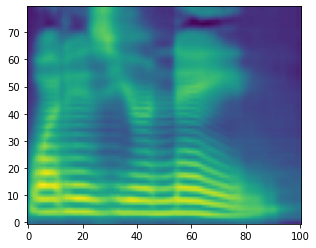

In [ ]:
# 输入文字
print(f"Input your favorite sentence ")
text = input()
# 生成输入文字的频谱图并进行可视化
tokens = spectrogram_generator.parse(text)
spectrogram = spectrogram_generator.generate_spectrogram(tokens = tokens)
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
%matplotlib inline
imshow(spectrogram.cpu().detach().numpy()[0], origin="lower")
plt.show()
# 生成音频文件写入磁盘并播放
sf.write("speech.wav", text_to_audio(text)[0],22050)
IPython.display.Audio(text_to_audio(text), rate=22050)

### #5 端到端模型对比

In [ ]:
e2e_model = nemo_tts.models.FastSpeech2HifiGanE2EModel.from_pretrained(model_name="tts_en_e2e_fastspeech2hifigan")
parsed = e2e_model.parse("what is your name ?")
audio2 = e2e_model.convert_text_to_waveform(tokens=parsed)
audio2 = torch.stack(audio2)
IPython.display.Audio(audio2.to('cpu').detach().numpy(), rate=22050)

[NeMo I 2021-07-27 21:14:24 cloud:56] Found existing object /root/.cache/torch/NeMo/NeMo_1.0.2/tts_en_e2e_fastspeech2hifigan/bc7da373632e5b73cceaa1540d126010/tts_en_e2e_fastspeech2hifigan.nemo.
[NeMo I 2021-07-27 21:14:24 cloud:62] Re-using file from: /root/.cache/torch/NeMo/NeMo_1.0.2/tts_en_e2e_fastspeech2hifigan/bc7da373632e5b73cceaa1540d126010/tts_en_e2e_fastspeech2hifigan.nemo
[NeMo I 2021-07-27 21:14:24 common:675] Instantiating model from pre-trained checkpoint


[NeMo W 2021-07-27 21:14:28 modelPT:137] If you intend to do training or fine-tuning, please call the ModelPT.setup_training_data() method and provide a valid configuration file to setup the train data loader.
    Train config : 
    dataset:
      _target_: nemo.collections.tts.data.datalayers.FastSpeech2Dataset
      manifest_filepath: /raid/LJSpeech/nvidia_ljspeech_train.json
      mappings_filepath: /mnt/mappings.json
      sample_rate: 22050
      max_duration: null
      min_duration: 1.1
      ignore_file: /mnt/wavs_to_ignore.pkl
      trim: false
    dataloader_params:
      drop_last: false
      shuffle: true
      batch_size: 48
      num_workers: 4
    
[NeMo W 2021-07-27 21:14:28 modelPT:144] If you intend to do validation, please call the ModelPT.setup_validation_data() or ModelPT.setup_multiple_validation_data() method and provide a valid configuration file to setup the validation data loader(s). 
    Validation config : 
    dataset:
      _target_: nemo.collections.tts

[NeMo I 2021-07-27 21:14:28 features:252] PADDING: 0
[NeMo I 2021-07-27 21:14:28 features:269] STFT using torch
[NeMo I 2021-07-27 21:14:29 features:252] PADDING: 0
[NeMo I 2021-07-27 21:14:29 features:269] STFT using torch


[NeMo W 2021-07-27 21:14:29 nemo_logging:349] /root/anaconda3/lib/python3.8/site-packages/nemo/core/classes/modelPT.py:243: UserWarning: update_node() is deprecated, use OmegaConf.update(). (Since 2.0)
      self.cfg.update_node(config_path, return_path)
    


[NeMo I 2021-07-27 21:14:30 modelPT:434] Model FastSpeech2HifiGanE2EModel was successfully restored from /root/.cache/torch/NeMo/NeMo_1.0.2/tts_en_e2e_fastspeech2hifigan/bc7da373632e5b73cceaa1540d126010/tts_en_e2e_fastspeech2hifigan.nemo.


### #6 将语音转成文字并进行翻译

In [ ]:
text = quartznet.transcribe(paths2audio_files=["/root/speech.wav"]) # 调用transcribe函数测试预训练模型识别效果
print(text)
chinese_text = nmt_model.translate(text)
chinese_text = " ".join(chinese_text)
print(chinese_text)

[NeMo W 2021-07-27 21:16:23 patch_utils:49] torch.stft() signature has been updated for PyTorch 1.7+
    Please update PyTorch to remain compatible with later versions of NeMo.



['what is your name']
你叫什么名字


### #7 加载Espnet的中文预训练模型

In [ ]:
from espnet2.bin.tts_inference import Text2Speech
from parallel_wavegan.utils import load_model

text2speech = Text2Speech(
    "config.yaml",
    "train.loss.ave_5best.pth",
    device="cuda"
)
vocoder2 = load_model("checkpoint-400000steps.pkl").to("cuda").eval()

### #8 让翻译好的文字会说中国话

In [ ]:
with torch.no_grad():
    wav, c, *_ = text2speech(chinese_text)
    wav = vocoder2.inference(c)

from IPython.display import display, Audio
display(Audio(wav.view(-1).cpu().numpy(), rate=24000))